# Conditional Deep Convolutional Generative Adversarial Network (cDCGAN)
### Exploring Different Architectures

## Author's Note

In my previous cDCGAN assignment, I built a cDCGAN and trained it on both the CIFAR10 and my novel dataset (of cyberpunk, cartoon, and noir artwork) for 60 epochs. I embedded the conditional input into the discriminator by concatenating it with the network activations from the convolutional blocks, right before they are fed into the final linear layer. The results showed some visual differences between the different CIFAR10 classes, even if the generated images did not really resemble the real images. The generated images for the novel dataset however had a high degree of visual similarity and were virtually indiscernible as different classes, except for minute visual differences such as slight variations in color intensity. My conclusion was that the model may be experiencing mode collapse, and that the underlying data itself may have low inter-class variation in the first place, thus exacerbating the mode collapse effect.

## Introduction

In this assignment, I intend to expand on the previous cDCGAN assignment by exploring different conditional DCGAN architectures, increasing the number of training epochs, and applying quantitative metrics to analyze the model results. The motivation behind each task is listed as follows:

- **Exploring Different cDCGAN Architectures.** Since neural networks often operate in a black box, it is common to experiment with different network architectures to test out which one outperforms the other. As networks that are both deep and convolutional have been shown to return the best performance when working with image-related tasks (citation?), the different architectures to be explored will most likely still be deep and convolutional, with a modification being made to either the label-embedding method, or adding an upsampling method to increase image quality.


- **Increasing Number of Training Epochs.** Increasing the number of training epochs will almost always generate better images since the model goes through more iterations of backpropagation, and so the parameter weights are further along in the fine-tuning process. As I only trained the model for 60 epochs previously, I intend to train the new model for at least 100 epochs.


- **Applying Quantitative Metrics on the Results.**. Manual inspection of the model output can be extremely subjective and often inconclusive. While quantitative metrics such as the Inception Score (IS) or Fréchet Inception Distance (FID) should not necessarily be taken as a direct measure of how "good" the model is, they still provide a relatively objective measure of comparison of model performance, and can at least reveal some quantitative insights on the model's diversity and ability to generate real images based on comparisons with the generated image distributions on one hand, and the real image distribution on the other.

## Literature Review

### Conditional GAN

According to Mirza and Osindero (2014), "Generative adversarial nets can be extended to a conditional model if both the generator and discriminator are conditioned on some extra information $y$. $y$ could be any kind of auxiliary information,
such as class labels or data from other modalities. We can perform the conditioning by feeding $y$ into both the discriminator and generator as additional input layer."

Some motivations for including the class label within the input are (Brownlee, 2019):

- To improve GAN performance by making use of additional information (class labels) that is correlated with the input images.

- To generate targeted images.

### Embedding Class Labels

Given a conditional GAN model, there are a few ways that one can choose to embed the class label. The efficacy of each embedding method in utilizing the label information to generate fake images and discriminate real images from fake ones can then be evaluated by comparing the quality of fake conditional images generated using the different methods.

#### cGAN vs cDCGAN

In a vanilla conditional GAN network with linear layers, $y$ could be embedded into the input via simple concatenation. According to Brownlee (2019), one of the best practices in encoding and incorporating class labels into both the discriminator and generator models entails "using an embedding layer followed by a fully connected layer with a linear activation that scales the embedding to the size of the image before concatenating it in the model as an additional channel or feature map".

In a conditional DCGAN network with convolutional layers, the encoding of class labels becomes a bit trickier since the images are not flattened into a single dimension before being fed into the network. Instead, the DCGAN network normally takes in an input of 3 dimensions, i.e. width x heights x number of channels. The image is then continuously convolved through multiple kernels in the network without ever having to be flattened until a final classification decision has to be made using a linear layer (e.g. sigmoid) at the output. 

#### Label-Embedding Methods

The figure below illustrates the different network architectures tested out by Cao, Dulloor, and Prasetio (2017) while building a conditional GAN to generate faces. The networks differ in the type of layers used (convolutional vs fully-connected) and the label-embedding method. Since cDenseGAN#1 and cDenseGAN#2 consist of only fully-connected layers, I will instead focus on the cDCGAN networks. 

<img src='report-figures/cGAN-archs.png' style='width:50%'>

The label-embedding method for the cDCGAN networks, alongside their motivation and results were as follows:

- **cDCGAN#1**. Labels fed only to the first layer of the generator and discriminator. This method would seem like the most intuitive and obvious way of attempting to concatenate labels to an image being fed into a deep convolutional network. The results showed decent image quality.


- **cDCGAN#2**. Labels fed to every single layer of the generator and discriminator. The motivation behind this method was that "given sufficient mixing of conditionals at every layer, the model will be able to better learn the joint distribution of images and labels and produce good quality images with the correct identities" (Cao, Dulloor, & Prasetio, 2017). However, the generated images were of very poor quality, i.e. highly pixelated and off-colour. The authors attributed this to the fact that mixing labels in every layer of the network resulted in a very sparse tensor with a lot of zeros in each of the layers (since the labels are concatenated to the layers as one-hot-encoded tensors).


- **cDCGAN#3**. Labels fed straight to the fully-connected layers of both the generator and the discriminator. The idea being that "there is no good reason to inject conditionals at any of the convolutional layers since conditionals do not have any spatial aspect" (Cao, Dulloor, & Prasetio, 2017). The results showed a significant improvement in generated image quality.


<img src='report-figures/cdcgan-outputs.png' style='width:50%'>

The **cDCGAN#1** network aligns with Kang's (2017) method of embedding the class labels to the image by concatenating the labels to the first convolutional layer. This means the image was "conditioned" on the class before going through the main convolutional layers.

Wang, Dantcheva, and Bremond (2018) also utilized this architecture when generating faces based on attributes that should affect facial appearance, e.g. male/female, young/old, smile/no smile. 

<img src='report-figures/wang-network.png' style='width:50%'>

<img src='report-figures/wang-results.png' style='width:50%'>

<img src='report-figures/wang-eval.png' style='width:50%'>

Their results showed a higher Inception Score (IS) and lower Fréchet Inception Distance (FID) when the model is trained on a higher number of conditional attributes. Since a high IS represents high generated image diversity and a low FID signifies that the generated images have low amount of different with the real images from the original dataset, their results suggest that the more conditionals the model can use as information, the higher quality the generated images (as evaluated by IS and FID). As such, apart from the network architecture itself, there is also a consideration of the type and quantity of data that is being fed into the network.

The **cDCGAN#3** network aligns with Desai's (2018) method of embedding the class labels to the image after the convolutional layers, but before the input is fed into the fully-connected layers of the network. That is, given a conventional deep CNN model structured as `INPUT -> [CONV -> RELU -> POOL]*2 -> FC -> RELU -> FC` (Karpathy & Johnson, 2017), the class labels will be concatenated after the `CONV` block but before the `FC` layers.

#### Architectural Choice for this Assignment

In my previous assignment, I implemented Desai's (2018) method, aka **cDCGAN#3**, as I liked his reasoning that the class label should be considered a "higher-level" feature that would be embedded near the tail-end of the conditional DCGAN to provide further information to the network. Indeed, Cao, Dulloor, and Prasetio's (2017) empirical results also show that this architecture produces the best images, as evaluated both qualitatively (manual inspection) and quantitatively (since the images were celebrity faces, face-detection and ID-matching software were used to calculate quantitative results).

In this assignment, I plan to implement Kang's (2017) method, aka **cDCGAN#1**, to compare the results against those of my previous assignment. While Cao, Dulloor, and Prasetio (2017) have already shown **cDCGAN#3** to be the superior architecture, it is still worth investigating the difference in generated image quality between **cDCGAN#1** and **cDCGAN#3** for myself since I am working with a novel dataset (cyberpunk, noir, and cartoon artwork). I can then compare the genre-conditioned artwork generated by each network to each other to evaluate the efficacy of the different models.

## Implementation

Following the footsteps of Wang, Dantcheva, and Bremond (2018); and Cao, Dulloor, and Prasetio's (2017) **#cDCGAN1 architecture**, I modified my DCGAN model to make use of conditional labels by embedding the labels in the early convolutional layers of the DCGAN network. I made reference to Kang's (2017) github repo - which contained a Pytorch implementation of a conditional GAN with labels embedded in the convolutional layer - and adapted his code to that of my existing model.

### How should labels be broadcasted from 1D to 4D?

<img src='report-figures/kang-cdcgan.png' style='width:75%'>

In Kang's (2017) illustration of his network architecture, we see that that labels are broadcast from a 1D tensor to a 4D tensor before being fed into both the discriminator and the generator. This is so the 4D label tensors can be concatenated to the 4D image tensors ([batch_size, number_of_channels, width, height]) before being passed along the convolution layers of the network. 

I was quite confused as to how to broadcast a 1D shape to a 4D shape without losing any information, or misrepresenting the label information. In the end, I decided on broadcasting the labels using a combination of Pytorch's `unsqueeze` and `expand` methods. The steps I took are listed below:

1) The 1D label tensor is converted to a 2D tensor by:
- initializing an empty 2D matrix of size (batch_size, number_of_classes)
- one-hot-encoding the labels into the 2D matrix using the `scatter_` method 

2) The 2D tensor is broadcasted into a 3D tensor by:
- unsqueezing it into a tensor of size [batch_size, number_of_classes, 1]
- expanding it into a tensor of size [batch_size, number_of_classes, image_size], where image_size is the height dimension of the image data that we are trying to concatenate the labels to.

3) The 3D tensor is broadcasted into a 4D tensor by:
- unsqueezing it into a tensor of size [batch_size, number_of_classes, image_size, 1]
- expanding it into a tensor of size [batch_size, number_of_classes, image_size, image_size], where the second image_size is the width dimension of the image data that we are trying to concatenate the labels to. I used image_size to signify both the height and width variables since I am dealing with square images.

The `expand_labels` method is used in my GAN model to expand the 1D label tensors to a 4D tensor of size [batch_size, number_of_classes, 32, 32] when feeding into the discriminator, and a 4D tensor of size [batch_size, number_of_classes, 1, 1] when feeding into the generator (since the generator's "input" is a noise vector of size [batch_size, latent_vector_size, 1, 1]). The code snippet of the method is show below:

In [ ]:
def expand_labels(self, labels, batch_size, n_classes, img_size):

    '''
    Function to broadcast 1D label tensor to 4D tensor.

    Inputs

        labels (ARR)
            1D array of integer-labels to be casted to a 4D tensor. 

        batch_size (INT)
            Batch size of the current dataset

        n_classes (INT)
            Number of classes in the labels.

        img_size
            The sizes of the 3rd and 4th dimension, which are assumed to be of equal size
            since we are dealing with square images. The 2nd dimension is always the 
            number of classes.

    '''

    # convert labels to 2D for the scatter
    y = labels.view(-1,1)

    # create one-hot-encoding buffer
    y_onehot = torch.FloatTensor(batch_size, n_classes)

    # fill buffer with zeros
    y_onehot.zero_()

    # fill buffer with 1 where index == label value
    y_onehot.scatter_(1, y, 1)

    # cast 2D tensor to 3D
    y_onehot.unsqueeze_(-1) # [batch_size, n_classes, 1]
    y_onehot = y_onehot.expand(batch_size, n_classes, img_size)

    # cast 3D tensor to 4D
    y_onehot.unsqueeze_(-1) # [batch_size, n_classes, img_size, 1]
    y_onehot = y_onehot.expand(batch_size, n_classes, img_size, img_size)

    return y_onehot

## Data

Two datasets were used to test the efficacy of the cDCGAN: the CIFAR10 dataset and a custom dataset.

The CIFAR10 dataset consisted of 10 classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. 50,000 images were used to train the cDCGAN, with an even distribution of 5,000 images per class.

The custom dataset consisted of 3 classes: cartoon, cyberpunk, and noir digital artwork. The digital art was scraped from https://www.artstation.com/. The classes have 9924, 9859, and 3567 entries respectively. 


## Parameter Values

Most parameters were set according to the Pytorch tutorial on building a DCGAN model. The following custom adjustments were also carried out:

- The images were resized to (32, 32, 3) for faster computation, and the feature map size for both the generator and the discriminator were also set to 32. 

- The batch size was set to 128.

## Implementation

The cDCGAN was trained for 30 epochs on the CIFAR10 dataset and 30 epochs on the novel dataset. The parameters were kept the same across both training procedures, aside from the dataloaders.


### Training Process

The training process was carried out as follows:

1) Initiailize cDCGAN object with designated parameters.

2) Train for a set number of epochs. The model automatically saves checkpoints at every 5 epochs, as well as after the last epoch.

3) If more training is desired, load model from last epoch to continue training.

## Results

### CIFAR10 Model Results

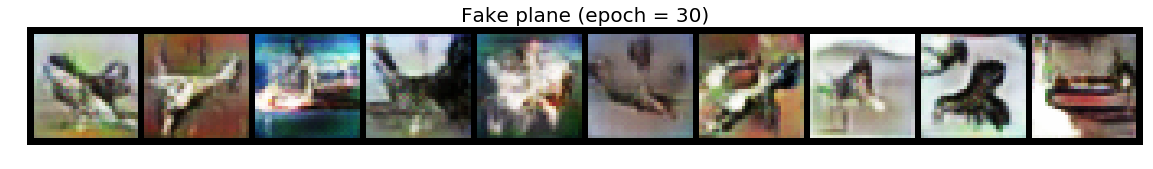

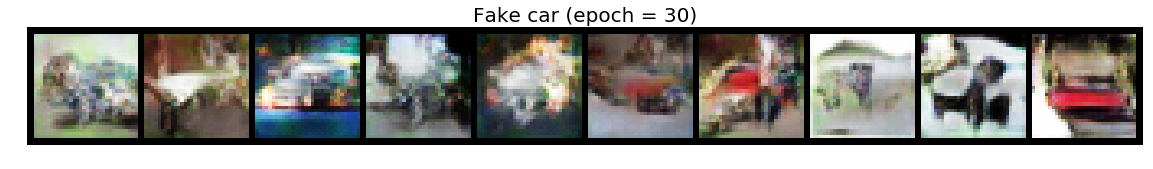

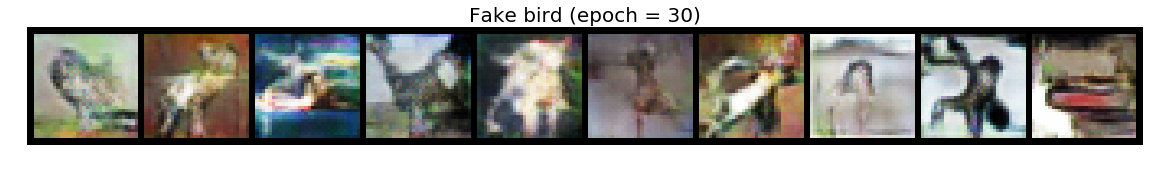

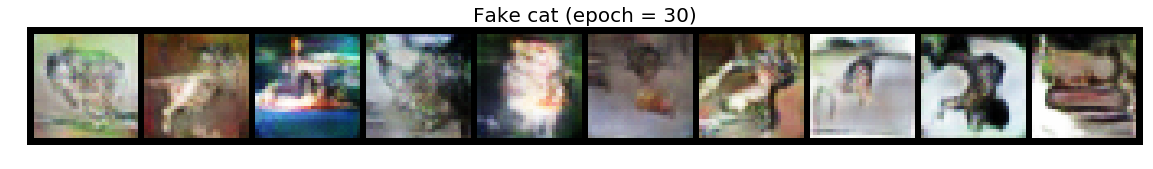

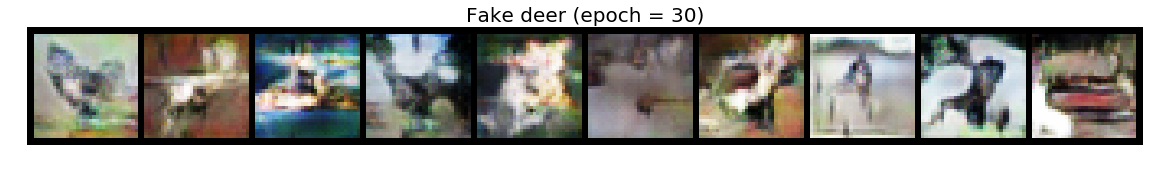

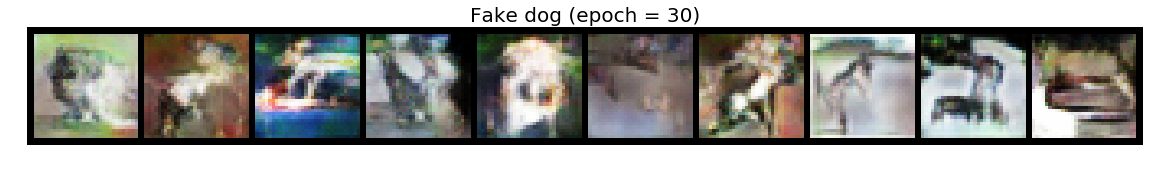

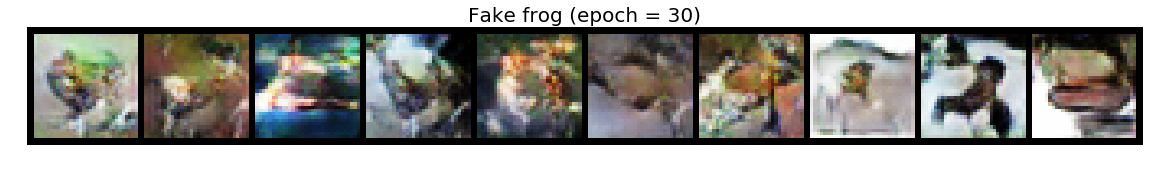

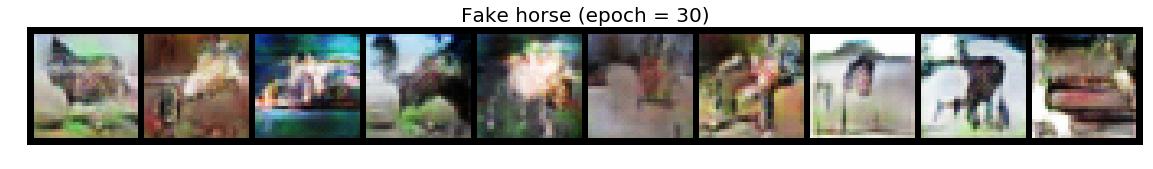

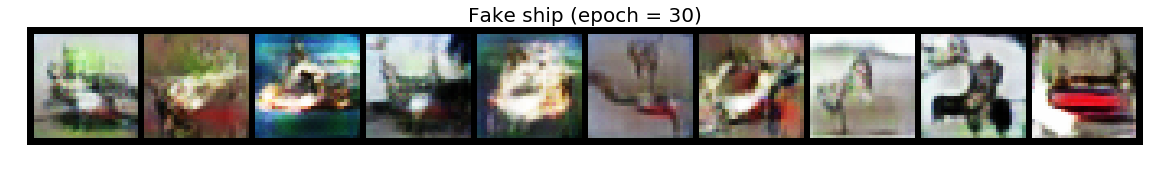

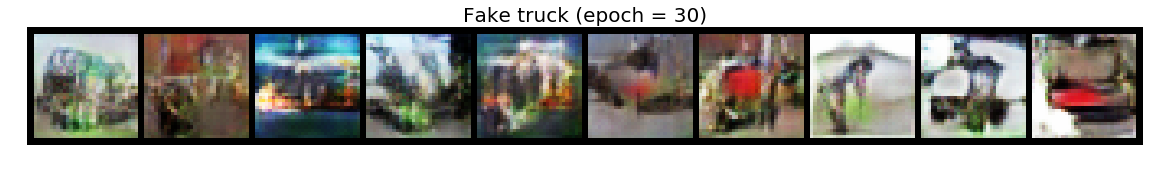

In [139]:
plot_gen_images(cifar_classes, cdcgan_cifar)

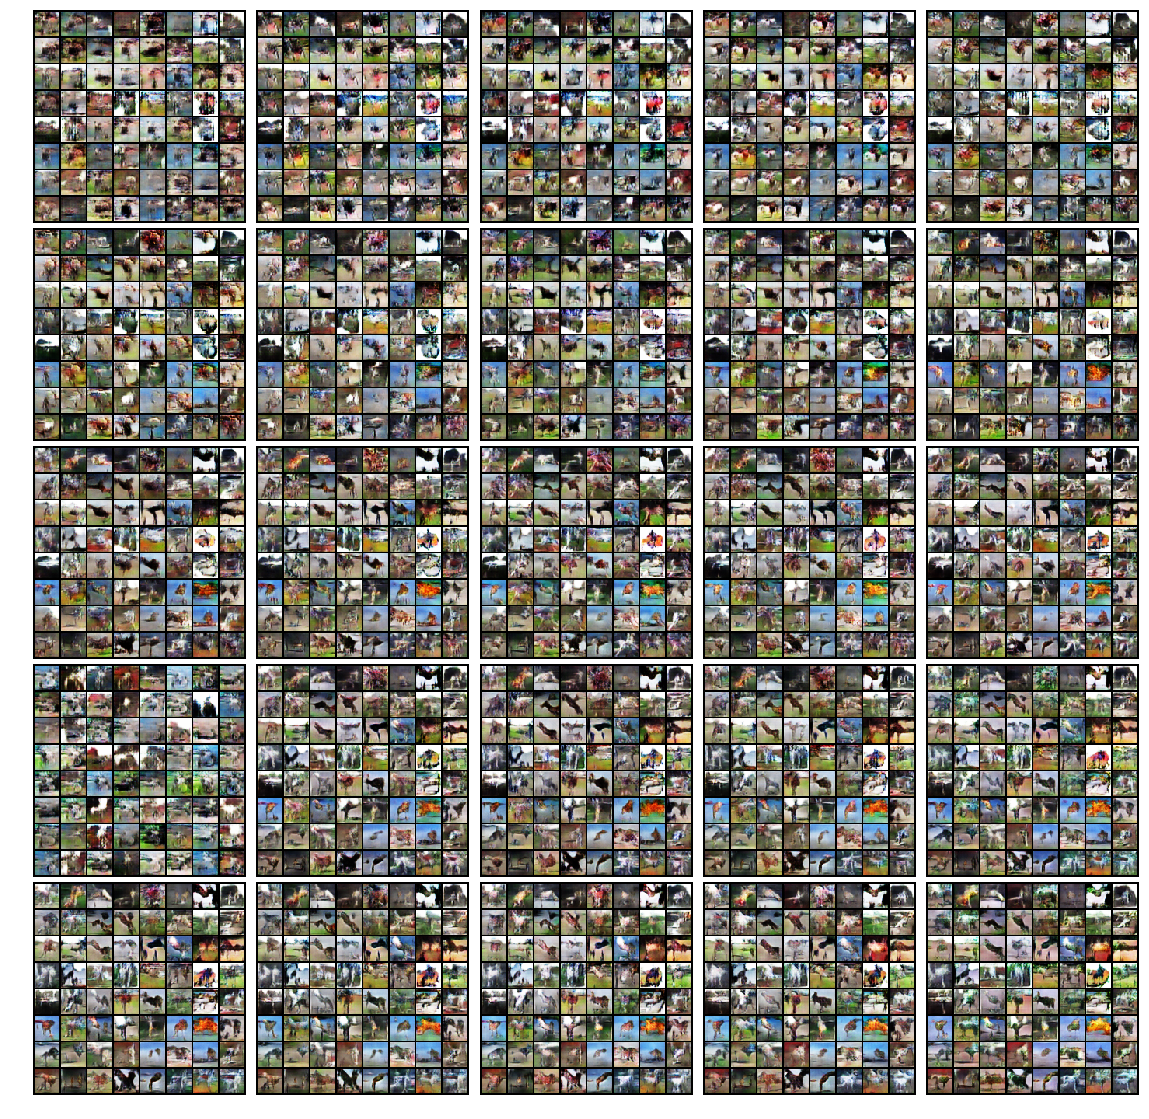

In [125]:
plot_progression('cDCGAN-cifar/fake_images/', 'horse', fig_w = 20, fig_h = 40, nrows = 10, ncols = 5)

### Novel Dataset Model Results

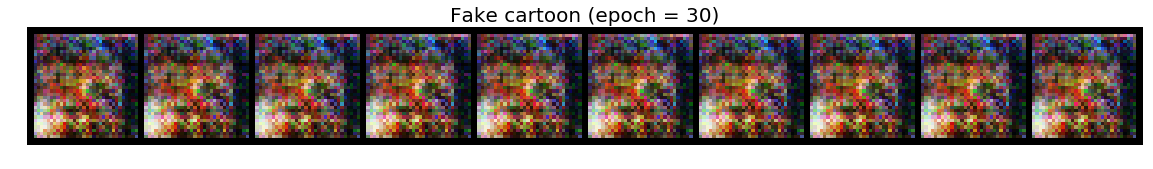

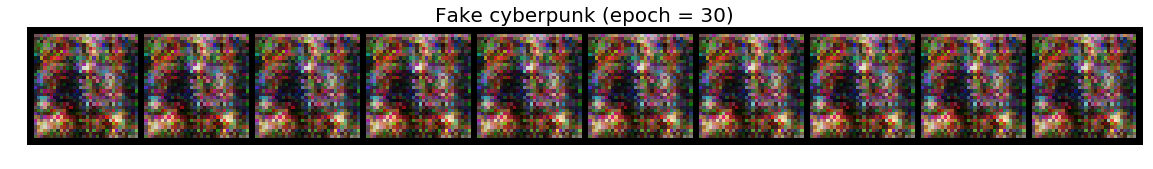

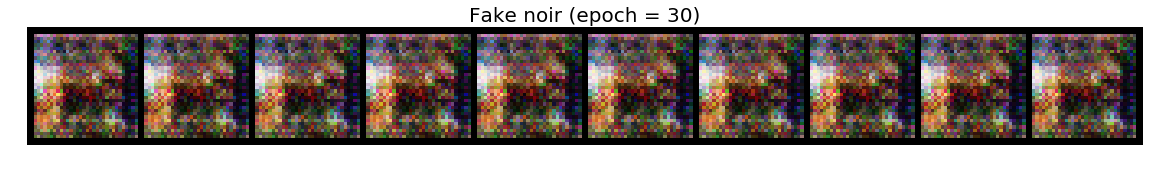

In [140]:
plot_gen_images(dataset.classes, cdcgan)

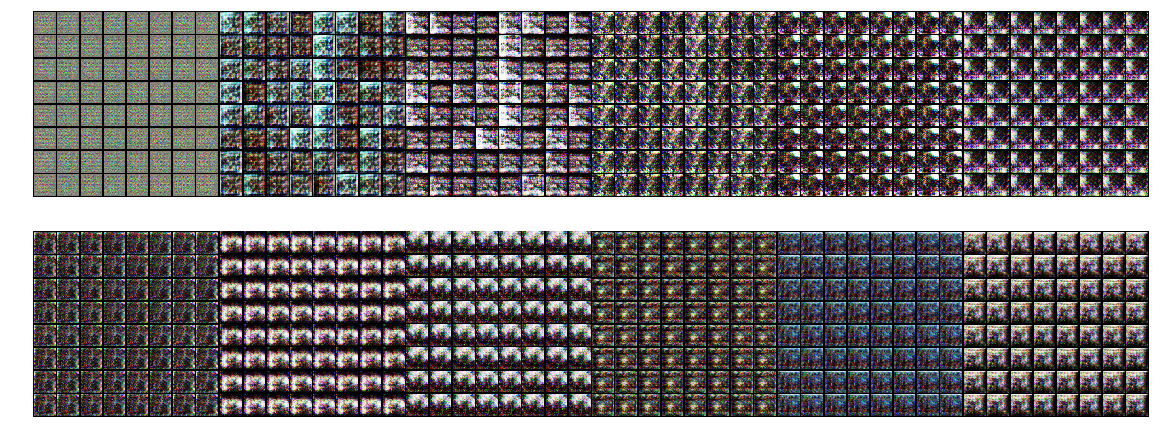

In [131]:
plot_progression('cDCGAN/fake_images/', 'cyberpunk', fig_w = 20, fig_h = 8, nrows = 2, ncols = 6)

## Analysis and Summary

The results look significantly better for the CIFAR10 Model vs the Novel Dataset Model. 

In the CIFAR10 Model results, the horse class actually looks quite distinctly like horses. We also see that the car, ship, and truck classes have a stronger emphasis on the color red, which suggests that the network is picking up that red is commonly associated with these classes, but not with the other animal-based classes, which makes sense.

For the Novel Dataset Model, the results look pretty bad. The image generation progression across epochs doesn't show any significantly development in the image generation, there appears to be significant mode collapse (the intraclass diversity is non-existent), and the interclass diversity is also non-existent.

I'm not sure why the novel dataset model is performing so poorly vs the CIFAR10 model, since the same architecture is being used. There is either a slim chance that I accidentally hardcoded something that specifically suits the CIFAR10 model into the network, or perhaps something about the nature of the novel dataset that doesn't work well with embedding labels to the convolutional layers, e.g. small number of classes (3 vs 10), nature of the dataset (artwork is more similar across classes vs the CIFAR10 dataset).


## Future Work

### Increasing the amount of label attributes embedded into the data

In light of Wang, Dantcheva, and Bremond's (2018) experimental results which show that embedding a higher number of attributes leads to better IS and FID scores, I am wondering if I should find a way to assign further attributes to my novel dataset, e.g. dark/bright, character/landscape, to be embedded into the model. My main concern is that I am already quite confused as to how a single label (in this case, artwork genre) is being sensibly broadcasted into a 4D shape in a way that represents the label information accurately, and so adding even more labels will convolute my conceptual understanding of this representation even further. However, I suppose this can be overcome through further research and experimentation.

### Studying and Replicating ArtGAN

While conducting my literature review, I found a paper written by Tan, Chan, Aguirre, and Tanaka (2018), which specifically implements a conditional GAN for creating artwork based on genres, artists, styles, etc. Their results were very interesting and appear to be highly relevant to my Capstone project of creating artwork based on their assigned movie genre (cyberpunk, noir, cartoon, etc.). 

The authors used a few methods that apparently improved on existing conditional GAN architectures thus far:

- **Categorical autoencoder-based discriminator.** The authors incorporated an autoencoder into the categorical discriminator in their ArtGAN model as a source of additional complementary information for the model. The justification provided was as follows: 

"The core idea of using an autoencoder in the discriminator is that reconstruction-based output offers diverse targets, which produce a very different gradient directions within the minibatch. Conceptually, this improves the efficiency and effectiveness when training a GAN model" (Tan, Chan, Aguirre, & Tanaka, 2018).

- **Improving generated image quality by upsamping then downsampling generated images.** The authors first upsample the generated images so that they were of higher resolution than the real dataset, e.g. (64, 64), then using a pooling method to downsample the images by an appropriate factor, e.g. downsample by factor of 2 to get images of size (32, 32) again. The pooling method used by the authors was overlapped average pooling, which "discourages the generator from blindly computes the same pixel value within the same pooling block" (Tan, et al., 2018). The authors found that using the Image Quality (IQ) strategy often resulted in higher-quality images, and deduced that "richer representation[s] can be learned with higher feature dimension."

#### ArtGAN Results

The generated images from the ArtGAN look quite promising, as the model appears to be able to create distinct artwork based on either a given genre, artist, or style. In this case, genre refers to landscape, portrait, abstract, etc. while style refers to Rococco, Ukiyo-e, Renaissance, etc. The authors found that the model performed best (created the most class-distinctive artwork) when differentiating art genres (probably due to the distinct different in subject vs object in the images), but performed worse on art styles due to the high overlap between various styles.

<img src='report-figures/artgan-genre.png' style='width:75%'>
<img src='report-figures/artgan-artist.png' style='width:75%'>
<img src='report-figures/artgan-style.png' style='width:75%'>

#### Single Label vs Multiple Labels

As opposed to Wang, Dantcheva, and Bremond (2018), Tan et al. (2018) did not feed multiple labels simultaneously into their model, but instead trained a seperate model for each label feature, e.g. genre, artist, or style. While Wang, Dantcheva, and Bremond's results would suggest that the inclusion of all the labels in one run of the model would increase the amount of information being fed into the model, and so improve the model performance, it is difficult to say whether this would translate well to the domain of artwork.


# Code

## Import Libraries

In [4]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from torchsummary import summary
from torchvision.utils import save_image
import torchvision

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


## Set Parameter Values

In [5]:
# Root directory for dataset
dataroot = 'images'

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this size using a transformer.
image_size = 32

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 32

# Size of feature maps in discriminator
ndf = 32

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

## Import Data

In [6]:
def plot_images(dataloader, classes, image_number = 8, model = None):
    
    '''
    Function to plot a sample of images from the dataloader, alongside their class labels.
    If a model is assigned to the model parameter, the predicted labels will be printed as well.
    
    Input:
        dataloader (DATALOADER)
            Dataloader of dataset.
            
        classes (ARR)
            Array type object containing the class labels (strings) in the order that 
            corresponds with the numerical key in the dataloader.
        
        image_number (INT)
            Number of images to plot from the dataloader. image_number should not exceed batch size.
            Since images are plotted in a row, any number > 10 could cause display issues.
            Default: 8.
        
        model (PYTORCH MODEL)
            Optional parameter. If a model is provided, the predicted labels from the 
            model for each of the images will be printed as well. 
            Default: None.
    '''
    
    # get images and true labels
    images, labels = next(iter(dataloader))

    # plot images
    plt.figure(figsize=(16,16))
    plt.axis("off")
    plt.imshow(np.transpose(vutils.make_grid(images.to(device)[:image_number], padding=1, normalize=True).cpu(),(1,2,0)))
    
    # print true labels
    print('True labels: ', '     '.join('%5s' % classes[labels[j]] for j in range(image_number)))
    
    if model:
        # predict image classes using custom net
        outputs = model(images)
        # the outputs are energies for the 10 classes. 
        # the higher the energy for a class, the more the network thinks that the image is of the particular class.
        # So, we get the index of the highest energy:
        _, predicted = torch.max(outputs, 1)
        # print predicted labels
        print('Predicted:  ', '   '.join('%5s' % classes[predicted[j]] for j in range(image_number)))


def get_target_index(dataset):
    '''
    Given a dataset, this function returns a dictionary of classes, where the value of each class 
    is a dictionary containing the class indices and the number of datapoints in the class.
    
    Input:
        dataset (IMAGEFOLDER)
            Dataset should be ImageFolder class.
        
    Output:
        idx_dct (DCT)
            Nested dictionary with the class name as key, and a dictionary containing the
            'indices' and 'length' of the class as values.
            Example format:
            idx_dct = { 'class_A':{
                        'indices': [1,2,3,4,5],
                        'length': 5
                        },
                        'class_B':{
                        'indices': [6,7,8],
                        'length': 3
                        },
                        'class_C':{
                        'indices': [100,101,102,103],
                        'length': 4
                        }}
    '''
    targets = torch.tensor([t[1] for t in dataset.samples])
    idx_dct = {}
    
    for k,v in dataset.class_to_idx.items():
        idx_dct[k] = {'indices': (targets == v).nonzero().reshape(-1)}
        idx_dct[k]['length'] = len(idx_dct[k]['indices'])
        
    return idx_dct


def plot_batch(dataloader):    
    '''
    Plot images from a dataloader
    '''
    real_batch = next(iter(dataloader))
    plt.figure(figsize=(8,8))
    plt.axis("off")
    plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
    

## CIFAR10 Dataset

Files already downloaded and verified
True labels:   deer      deer       cat      deer      deer     horse       dog      frog


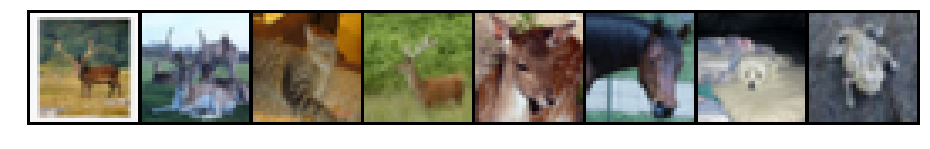

In [7]:
# transform images to tensor and normalize
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# create dataloaders
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

cifar_classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# plot sample of images
plot_images(trainloader, cifar_classes)

## Novel Dataset

Class cartoon has 9924 entries.
Class cyberpunk has 9859 entries.
Class noir has 3567 entries.
True labels:  cyberpunk     cyberpunk     cyberpunk     cartoon     cartoon     cartoon     cartoon     cyberpunk


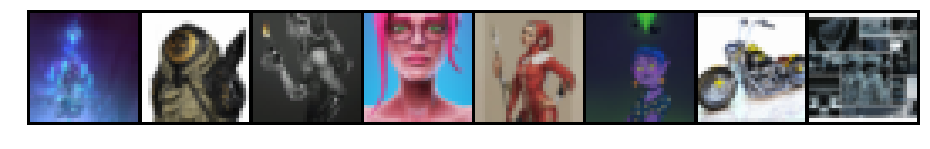

In [8]:
# Create the dataset
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                           transforms.Resize(image_size),
                           transforms.CenterCrop(image_size),
                           transforms.RandomHorizontalFlip(p=0.5),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

target_idx_dct = get_target_index(dataset)
for k,v in target_idx_dct.items():
    print(f"Class {k} has {v['length']} entries.")

dataloader = torch.utils.data.DataLoader(dataset, batch_size = batch_size, shuffle = True)

plot_images(dataloader, dataset.classes, image_number = 8)

## cDCGAN Model

In [9]:
def weights_init(m):
    '''
    Custom weights initialization called on netG and netD
    '''
    classname = m.__class__.__name__
    
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [28]:
class cDiscriminator(nn.Module):
    
    def __init__(self, n_classes, ngpu):
        
        super(cDiscriminator, self).__init__()
        
        self.ngpu = ngpu
        
        self.image_conv = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, 32, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
        )
        
        self.label_conv = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(n_classes, 32, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
        )
        
        self.main = nn.Sequential(
            
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf*2, ndf*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf*2),
            nn.LeakyReLU(0.2, inplace=True),
            
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            
            # state size. (ndf*4) x 8 x 8
            # nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            # nn.BatchNorm2d(ndf * 8),
            # nn.LeakyReLU(0.2, inplace=True),
            
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 4, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
        

    def forward(self, input, labels):
        
        x = self.image_conv(input)
        
        y = self.label_conv(labels)
        
        x = torch.cat([x, y], 1)
        
        x = self.main(x)
        
        return x
    

In [29]:
# Original Generator Code
# I ended up not using this in the model as I found it challenging to debug.
# In the final model, this set of code should be used.

class cGenerator(nn.Module):
    
    def __init__(self, n_classes, ngpu):
        
        super(cGenerator, self).__init__()
        
        self.ngpu = ngpu
        
        self.image_deconv = nn.Sequential(
            # input is Z going into a convolution
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True)
        )
        
        self.label_deconv = nn.Sequential(
            # input is labels going into a convolution
            nn.ConvTranspose2d(n_classes, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True)
        )
        
        self.main = nn.Sequential(
            
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 16, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )
        
        
    def forward(self, input, labels):
        
        # deconvolve image
        x = self.image_deconv(input)

        # deconvolve labels
        y = self.label_deconv(labels)

        # concatenate deconvolved image and labels
        x = torch.cat([x, y], 1) 

        # feed image-with-label-embedding into main network layers
        gen_img = self.main(x)

        return gen_img
  

In [101]:
import torch.nn.functional as F

# New Generator Code
# This was the generator code I referenced from Kang's repo: https://github.com/znxlwm/pytorch-MNIST-CelebA-cGAN-cDCGAN
# I modified it to suit my dataset (image size, number of classes, etc.)
# I ended up using this in my model since it was easier to debug (could print x after every layer)
# However, in the final model, I would want to use my own generator code (above) as I think it is a bit neater
# and easier to understand since it clearly seperates the image-deconvolution and label-deconvolution layers
# into seperate parts before concatenating together and feeding into the main deconvolutional layers.

class cGenerator(nn.Module):
    # initializers
    def __init__(self, n_classes, ngpu):
        super(cGenerator, self).__init__()
        self.deconv1_1 = nn.ConvTranspose2d(nz, ngf*8, 4, 1, 0)
        self.deconv1_1_bn = nn.BatchNorm2d(ngf*8)
        self.deconv1_2 = nn.ConvTranspose2d(n_classes, ngf*8, 4, 1, 0)
        self.deconv1_2_bn = nn.BatchNorm2d(ngf*8)
        
        self.deconv2 = nn.ConvTranspose2d(ngf*16, ngf*4, 4, 2, 1)
        self.deconv2_bn = nn.BatchNorm2d(ngf*4)
        
        self.deconv3 = nn.ConvTranspose2d(ngf*4, ngf, 4, 2, 1)
        self.deconv3_bn = nn.BatchNorm2d(ngf)
        
        self.deconv4 = nn.ConvTranspose2d(ngf, 3, 4, 2, 1)

    # forward method
    # def forward(self, input):
    def forward(self, input, label):
        x = F.leaky_relu(self.deconv1_1_bn(self.deconv1_1(input)), 0.2)
        y = F.leaky_relu(self.deconv1_2_bn(self.deconv1_2(label)), 0.2)
        x = torch.cat([x, y], 1)
        x = F.leaky_relu(self.deconv2_bn(self.deconv2(x)), 0.2)
        x = F.leaky_relu(self.deconv3_bn(self.deconv3(x)), 0.2)
        x = torch.tanh(self.deconv4(x))

        return x

In [102]:
class cDCGAN(object):
    
    '''
    Conditional DCGAN class.
    '''
    
    def _checkDirectory(self, dirName):
        
        if not os.path.exists(dirName):
            print(f"{dirName} directory does not exist. Making {dirName}")
            os.makedirs(dirName)
            
        else: print(f"{dirName} directory exists.")
    
    
    def __init__(self, dataloader, classes, save_dir, num_epochs,
                 criterion, netD, netG, optimizerD, optimizerG, device):
        
        # data parameters
        self.dataloader = dataloader
        self.classes = classes # class labels
        self.n_classes = len(classes) # number of classes
        
        # save file locations
        self._checkDirectory(save_dir) # check whether save dir exists
        self.checkpoint_dir = os.path.join(save_dir, 'checkpoints')
        self._checkDirectory(self.checkpoint_dir) # create checkpoints dir
        self.fake_image_dir = os.path.join(save_dir, 'fake_images')
        self._checkDirectory(self.fake_image_dir) # create fake images dir
        
        # model parameters
        self.num_epochs = num_epochs # number of epochs to train for
        self.start_epoch = 1 # the starting epoch
        self.criterion = criterion # loss function
        self.real_label = 1 # Establish convention for real and fake labels during training
        self.fake_label = 0

        # networks init
        self.netD = netD
        self.netG = netG
        self.optimizerD = optimizerD
        self.optimizerG = optimizerG
        
        # device
        self.device = device # specify device being used
        
        # Create fixed noise to visualize the progression of the generator
        self.fixed_noise = torch.randn(64, nz, 1, 1, device=self.device) # torch.Size([64, 100, 1, 1])
        
        
    def expand_labels(self, labels, batch_size, n_classes, img_size):
        
        '''
        Function to broadcast 1D label tensor to 4D tensor.
        
        Inputs
        
            labels (ARR)
                1D array of integer-labels to be casted to a 4D tensor. 
            
            batch_size (INT)
                Batch size of the current dataset
            
            n_classes (INT)
                Number of classes in the labels.
            
            img_size
                The sizes of the 3rd and 4th dimension, which are assumed to be of equal size
                since we are dealing with square images. The 2nd dimension is always the 
                number of classes.
        
        '''

        # convert labels to 2D for the scatter
        y = labels.view(-1,1)

        # create one-hot-encoding buffer
        y_onehot = torch.FloatTensor(batch_size, n_classes)

        # fill buffer with zeros
        y_onehot.zero_()
        
        # fill buffer with 1 where index == label value
        y_onehot.scatter_(1, y, 1)

        # cast 2D tensor to 3D
        y_onehot.unsqueeze_(-1) # [batch_size, n_classes, 1]
        y_onehot = y_onehot.expand(batch_size, n_classes, img_size) # [batch_size, n_classes, img_size]
        
        # cast 3D tensor to 4D
        y_onehot.unsqueeze_(-1) # [batch_size, n_classes, img_size, 1]
        y_onehot = y_onehot.expand(batch_size, n_classes, img_size, img_size) # [batch_size, n_classes, img_size, img_size]

        return y_onehot
    
    
    def generate_fake_images(self, class_index_tensor, noise, image_name = 'random', save = True):
        
        '''
        Generate a batch of fake images using current generator weights.
        
        Inputs
        
            class_index_tensor (LongTensor)
                The class index to create fake images for. The number of fake images generated is equal
                to the length of the tensor. So a tensor filled with 10 "1"s will generate 10 images for
                the class that corresponds to "1".
                
            noise (Tensor)
                Random noise that will be put through the generator weights to produce an image.
        
            image_name (STR)
                Image name for the saved file.
                If running this function in model training, image_name should contain a changing variable,
                otherwise the files will just keep overwriting each other with the same name.
                Default: 'random' (in case save = True but no image_name provided)
            
            save (BOOL)
                If save is TRUE, the image file will be saved in the specified "self.fake_image_dir".
                Otherwise, just return the image data for plotting.
                Default: TRUE
            
        ''' 
        with torch.no_grad():
            # create fake images for all the labels in class_index_tensor
            fake = self.netG(noise, class_index_tensor).detach().cpu()
        
        if save: # save images in the fake_image_dir
            save_image(fake.data, f'{self.fake_image_dir}/{image_name}.png',
                       nrow=8, padding=2, normalize=True)
        
        return fake.data
    

    def train(self):
        
        '''
        Training loop
        '''
        if self.num_epochs == 0:
            print(f"No epochs set for training. Exiting training loop.")
            return
            
        # Lists to keep track of progress
        self.G_losses = [] # generator loss
        self.D_losses = [] # discriminator loss
        iters = 0

        print("Starting Training Loop...")
        # For each epoch
        for epoch in range(self.start_epoch, self.start_epoch + self.num_epochs):
            # For each batch in the dataloader
            for i, (imgs, class_labels) in enumerate(self.dataloader):

                ############################
                # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
                ###########################

                ## Train with all-real batch
                ###########################
                self.netD.zero_grad()

                # Format batch
                real_imgs = imgs.to(self.device)
                b_size = real_imgs.size(0)

                # Set ground truth labels as REAL
                validity_label = torch.full((b_size,), self.real_label, device=device)

                # expand 1D class labels to 4D tensor
                class_labels = self.expand_labels(class_labels, b_size, self.n_classes, 32)
                
                # Forward pass real batch through D
                output = self.netD(real_imgs, class_labels).view(-1)

                # Calculate loss on all-real batch
                errD_real = self.criterion(output, validity_label)

                # Calculate gradients for D in backward pass
                errD_real.backward()
                D_x = output.mean().item()


                ## Train with all-fake batch
                ###########################
                # Generate batch of latent vectors
                noise = torch.randn(b_size, nz, 1, 1, device=device) # torch.Size([128, 100, 1, 1])

                # Generate batch of fake labels
                gen_labels = torch.randint(self.n_classes, (b_size,)).type(torch.LongTensor) # torch.Size([128])
                
                # reshape generated labels from 1D to 4D for generator
                gen_labels_G = self.expand_labels(gen_labels, b_size, self.n_classes, 1)
                
                # Generate fake image batch with G
                fake = self.netG(noise, gen_labels_G)

                # Update ground truth labels to FAKE
                validity_label.fill_(self.fake_label)
                
                # reshape generated labels from 1D to 4D for discriminator
                gen_labels_D = self.expand_labels(gen_labels, b_size, self.n_classes, 32)

                # Classify all fake batch with D
                output = self.netD(fake.detach(), gen_labels_D).view(-1)

                # Calculate D's loss on the all-fake batch
                errD_fake = self.criterion(output, validity_label)

                # Calculate the gradients for this batch
                errD_fake.backward()
                D_G_z1 = output.mean().item()

                # Add the gradients from the all-real and all-fake batches
                errD = errD_real + errD_fake

                # Update D
                self.optimizerD.step()

                ############################
                # (2) Update G network: maximize log(D(G(z)))
                ###########################

                self.netG.zero_grad()

                validity_label.fill_(self.real_label)  # fake labels are real for generator cost
                
                # Since we just updated D, perform another forward pass of all-fake batch through D
                output = self.netD(fake, gen_labels_D).view(-1)
                
                # Calculate G's loss based on this output
                errG = self.criterion(output, validity_label)
                
                # Calculate gradients for G
                errG.backward()
                D_G_z2 = output.mean().item()
                
                # Update G
                self.optimizerG.step()

                # Output training stats
                if i % 50 == 0:
                    print(f'[{epoch}/{self.start_epoch + self.num_epochs - 1}][{i}/{len(self.dataloader)}]\tLoss_D: {round(errD.item(),2)}\tLoss_G: {round(errG.item(),2)}\tD(x): {round(D_x,2)}\tD(G(z)): {round(D_G_z1/D_G_z2,2)}')

                # Save Losses for plotting later
                self.G_losses.append(errG.item())
                self.D_losses.append(errD.item())

                # Check how the generator is doing by saving G's output on fixed_noise
                # every 500 iterations, or on the last batch of the last epoch
                if (iters % 500 == 0) or ((epoch == self.num_epochs-1) and (i == len(self.dataloader)-1)):
                    
                    print("Saving a batch of fake images.")
                    
                    class_index = torch.arange(self.n_classes) # get class indices
                    for i in class_index:
                        class_index_tensor = torch.LongTensor(64).fill_(i) # repeat the same class index 64 times
                        class_index_tensor = self.expand_labels(class_index_tensor, 64, self.n_classes, 1) # reshape to 4D
                        self.generate_fake_images(class_index_tensor, self.fixed_noise,
                                                  image_name = f'{self.classes[i]}_e{epoch}', save = True)

                iters += 1

            # automatically save model for first epoch (testing) and every 5 epochs
            if epoch == 1 or epoch % 5 == 0: self.save(epoch)

        print(f"Finished Training for {epoch} epochs.")
        self.save(epoch)
        
        
    def save(self, epoch):
        
        # save the model checkpoint
        filepath = f'{self.checkpoint_dir}/checkpoint_e{epoch}.pth.tar'
        print(f"=> Saving checkpoint: {filepath}")

        state = {
            'D_losses': self.D_losses,
            'G_losses': self.G_losses,
            'epoch': epoch,
            'netD_state_dict': self.netD.state_dict(),
            'optimizerD': self.optimizerD.state_dict(),
            'netG_state_dict': self.netG.state_dict(),
            'optimizerG': self.optimizerG.state_dict(),
        }

        torch.save(state, filepath) 

        
    def load(self, loadpath):
        '''
        When loading model checkpoint, just load the epoch and state dicts to continue training.
        The D-loss and G-loss can be stored within their respective checkpoints
        and referred to later when needed.
        '''
        if os.path.isfile(loadpath):
            print(f"=> loading checkpoint: {loadpath}")
            checkpoint = torch.load(loadpath)

            self.start_epoch = checkpoint['epoch'] + 1
            self.netD.load_state_dict(checkpoint['netD_state_dict'])
            self.netG.load_state_dict(checkpoint['netG_state_dict'])
            self.optimizerD.load_state_dict(checkpoint['optimizerD'])
            self.optimizerG.load_state_dict(checkpoint['optimizerG'])

            print(f"=> loaded checkpoint: {loadpath}")
            print(f"Last epoch was {checkpoint['epoch']}")

        else: 
            print(f"=> No checkpoint found at: {loadpath}")
        
        
    def visualize_results(self):
        
        plt.figure(figsize=(10,5))
        plt.title("Generator and Discriminator Loss During Training")
        plt.plot(self.G_losses,label="G")
        plt.plot(self.D_losses,label="D")
        plt.xlabel("iterations")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
        

## CIFAR10 Model

In [103]:
# Create the Discriminator
netD = cDiscriminator(len(cifar_classes), ngpu).to(device)

# Apply the weights_init function to randomly initialize all weights to mean=0, stdev=0.2.
netD.apply(weights_init)

# Print the model
print(netD)

# Create the generator
netG = cGenerator(len(cifar_classes), ngpu).to(device)

# Apply the weights_init function to randomly initialize all weights to mean=0, stdev=0.2.
netG.apply(weights_init)

# Print the model
print(netG)

cDiscriminator(
  (image_conv): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace)
  )
  (label_conv): Sequential(
    (0): Conv2d(10, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace)
  )
  (main): Sequential(
    (0): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace)
    (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2, inplace)
    (6): Conv2d(128, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (7): Sigmoid()
  )
)
cGenerator(
  (deconv1_1): ConvTranspose2d(100, 256, kernel_size=(4, 4), stride=(1,

In [109]:
kwargs = {
    'dataloader': trainloader, # cifar dataloader
    'classes': cifar_classes, # cifar classes
    'save_dir':'cDCGAN-cifar',
    'num_epochs': 30,
    'criterion': nn.BCELoss(), # Initialize BCELoss function
    'netD': netD,
    'netG': netG,
    'optimizerD': optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999)),
    'optimizerG': optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999)),
    'device': device
}
    
cdcgan_cifar = cDCGAN(**kwargs)

cDCGAN-cifar directory exists.
cDCGAN-cifar/checkpoints directory exists.
cDCGAN-cifar/fake_images directory exists.


In [110]:
cdcgan_cifar.train()

Starting Training Loop...
[1/30][0/391]	Loss_D: 0.68	Loss_G: 4.15	D(x): 0.89	D(G(z)): 13.23
Saving a batch of fake images.
[1/30][50/391]	Loss_D: 0.64	Loss_G: 2.08	D(x): 0.78	D(G(z)): 1.56
[1/30][100/391]	Loss_D: 0.76	Loss_G: 2.06	D(x): 0.65	D(G(z)): 1.05
[1/30][150/391]	Loss_D: 0.75	Loss_G: 2.41	D(x): 0.77	D(G(z)): 2.64
[1/30][200/391]	Loss_D: 0.78	Loss_G: 1.5	D(x): 0.56	D(G(z)): 0.19
[1/30][250/391]	Loss_D: 0.85	Loss_G: 2.38	D(x): 0.79	D(G(z)): 2.88
[1/30][300/391]	Loss_D: 0.55	Loss_G: 2.51	D(x): 0.8	D(G(z)): 1.98
[1/30][350/391]	Loss_D: 0.61	Loss_G: 2.92	D(x): 0.82	D(G(z)): 3.4
=> Saving checkpoint: cDCGAN-cifar/checkpoints/checkpoint_e1.pth.tar
[2/30][0/391]	Loss_D: 0.74	Loss_G: 1.62	D(x): 0.65	D(G(z)): 0.74
[2/30][50/391]	Loss_D: 0.6	Loss_G: 2.81	D(x): 0.89	D(G(z)): 3.52
[2/30][100/391]	Loss_D: 1.03	Loss_G: 0.98	D(x): 0.54	D(G(z)): 0.51
Saving a batch of fake images.
[2/30][150/391]	Loss_D: 0.62	Loss_G: 2.32	D(x): 0.78	D(G(z)): 1.84
[2/30][200/391]	Loss_D: 0.68	Loss_G: 2.12	D(x): 

[15/30][100/391]	Loss_D: 0.84	Loss_G: 2.76	D(x): 0.92	D(G(z)): 4.93
[15/30][150/391]	Loss_D: 0.67	Loss_G: 1.77	D(x): 0.66	D(G(z)): 0.71
[15/30][200/391]	Loss_D: 0.73	Loss_G: 1.94	D(x): 0.66	D(G(z)): 0.89
[15/30][250/391]	Loss_D: 0.95	Loss_G: 1.1	D(x): 0.52	D(G(z)): 0.37
[15/30][300/391]	Loss_D: 1.17	Loss_G: 1.06	D(x): 0.43	D(G(z)): 0.3
[15/30][350/391]	Loss_D: 1.84	Loss_G: 0.26	D(x): 0.23	D(G(z)): 0.04
=> Saving checkpoint: cDCGAN-cifar/checkpoints/checkpoint_e15.pth.tar
[16/30][0/391]	Loss_D: 0.83	Loss_G: 1.56	D(x): 0.59	D(G(z)): 0.53
[16/30][50/391]	Loss_D: 0.67	Loss_G: 2.1	D(x): 0.77	D(G(z)): 1.78
[16/30][100/391]	Loss_D: 0.97	Loss_G: 1.34	D(x): 0.53	D(G(z)): 0.48
Saving a batch of fake images.
[16/30][150/391]	Loss_D: 1.75	Loss_G: 3.74	D(x): 0.93	D(G(z)): 17.23
[16/30][200/391]	Loss_D: 0.47	Loss_G: 2.68	D(x): 0.86	D(G(z)): 2.26
[16/30][250/391]	Loss_D: 0.78	Loss_G: 2.32	D(x): 0.79	D(G(z)): 2.8
[16/30][300/391]	Loss_D: 0.67	Loss_G: 1.7	D(x): 0.66	D(G(z)): 0.67
[16/30][350/391]	Loss_

[29/30][200/391]	Loss_D: 1.11	Loss_G: 2.96	D(x): 0.9	D(G(z)): 7.07
[29/30][250/391]	Loss_D: 0.82	Loss_G: 1.56	D(x): 0.74	D(G(z)): 1.29
[29/30][300/391]	Loss_D: 0.81	Loss_G: 1.17	D(x): 0.59	D(G(z)): 0.4
[29/30][350/391]	Loss_D: 0.67	Loss_G: 1.64	D(x): 0.71	D(G(z)): 0.87
Saving a batch of fake images.
[30/30][0/391]	Loss_D: 0.64	Loss_G: 1.58	D(x): 0.66	D(G(z)): 0.5
[30/30][50/391]	Loss_D: 0.72	Loss_G: 3.31	D(x): 0.88	D(G(z)): 5.6
[30/30][100/391]	Loss_D: 0.65	Loss_G: 1.77	D(x): 0.67	D(G(z)): 0.62
[30/30][150/391]	Loss_D: 0.62	Loss_G: 2.11	D(x): 0.74	D(G(z)): 1.21
Saving a batch of fake images.
[30/30][200/391]	Loss_D: 0.79	Loss_G: 1.5	D(x): 0.72	D(G(z)): 0.86
[30/30][250/391]	Loss_D: 0.87	Loss_G: 2.62	D(x): 0.83	D(G(z)): 4.16
[30/30][300/391]	Loss_D: 0.48	Loss_G: 2.54	D(x): 0.85	D(G(z)): 2.04
[30/30][350/391]	Loss_D: 1.32	Loss_G: 0.62	D(x): 0.35	D(G(z)): 0.1
=> Saving checkpoint: cDCGAN-cifar/checkpoints/checkpoint_e30.pth.tar
Finished Training for 30 epochs.
=> Saving checkpoint: cDCGAN

In [118]:
cdcgan_cifar.load('cDCGAN-cifar/checkpoints/checkpoint_e30.pth.tar')

=> loading checkpoint: cDCGAN-cifar/checkpoints/checkpoint_e30.pth.tar
=> loaded checkpoint: cDCGAN-cifar/checkpoints/checkpoint_e30.pth.tar
Last epoch was 30


## Novel Dataset Model

In [112]:
# Create the Discriminator
netD = cDiscriminator(len(dataset.classes), ngpu).to(device)

# Apply the weights_init function to randomly initialize all weights to mean=0, stdev=0.2.
netD.apply(weights_init)

# Print the model
print(netD)

# Create the generator
netG = cGenerator(len(dataset.classes), ngpu).to(device)

# Apply the weights_init function to randomly initialize all weights to mean=0, stdev=0.2.
netG.apply(weights_init)

# Print the model
print(netG)

cDiscriminator(
  (image_conv): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace)
  )
  (label_conv): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace)
  )
  (main): Sequential(
    (0): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace)
    (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2, inplace)
    (6): Conv2d(128, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (7): Sigmoid()
  )
)
cGenerator(
  (deconv1_1): ConvTranspose2d(100, 256, kernel_size=(4, 4), stride=(1, 

In [114]:
kwargs = {
    'dataloader': dataloader, # novel data dataloader
    'classes': dataset.classes, # novel dataset classes
    'save_dir':'cDCGAN',
    'num_epochs': 30,
    'criterion': nn.BCELoss(), # Initialize BCELoss function
    'netD': netD,
    'netG': netG,
    'optimizerD': optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999)),
    'optimizerG': optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999)),
    'device': device
}
    
cdcgan = cDCGAN(**kwargs)

cDCGAN directory exists.
cDCGAN/checkpoints directory exists.
cDCGAN/fake_images directory exists.


In [115]:
cdcgan.train()

Starting Training Loop...
[1/30][0/183]	Loss_D: 1.55	Loss_G: 1.2	D(x): 0.41	D(G(z)): 1.45
Saving a batch of fake images.
[1/30][50/183]	Loss_D: 0.85	Loss_G: 4.69	D(x): 0.98	D(G(z)): 55.44
[1/30][100/183]	Loss_D: 0.34	Loss_G: 4.4	D(x): 0.91	D(G(z)): 16.42
[1/30][150/183]	Loss_D: 0.08	Loss_G: 4.35	D(x): 1.0	D(G(z)): 5.45
=> Saving checkpoint: cDCGAN/checkpoints/checkpoint_e1.pth.tar
[2/30][0/183]	Loss_D: 0.1	Loss_G: 3.85	D(x): 1.0	D(G(z)): 4.15
[2/30][50/183]	Loss_D: 0.07	Loss_G: 4.58	D(x): 0.95	D(G(z)): 0.92
[2/30][100/183]	Loss_D: 0.06	Loss_G: 3.3	D(x): 1.0	D(G(z)): 1.31
[2/30][150/183]	Loss_D: 0.04	Loss_G: 4.06	D(x): 0.99	D(G(z)): 1.74
[3/30][0/183]	Loss_D: 0.05	Loss_G: 3.75	D(x): 1.0	D(G(z)): 1.54
[3/30][50/183]	Loss_D: 0.07	Loss_G: 4.38	D(x): 0.96	D(G(z)): 1.7
[3/30][100/183]	Loss_D: 0.23	Loss_G: 7.16	D(x): 0.81	D(G(z)): 0.6
Saving a batch of fake images.
[3/30][150/183]	Loss_D: 0.0	Loss_G: 5.84	D(x): 1.0	D(G(z)): 1.07
[4/30][0/183]	Loss_D: 0.03	Loss_G: 3.97	D(x): 1.0	D(G(z)): 1.22


[29/30][150/183]	Loss_D: 0.0	Loss_G: 10.17	D(x): 1.0	D(G(z)): 1.02
Saving a batch of fake images.
[30/30][0/183]	Loss_D: 0.0	Loss_G: 10.2	D(x): 1.0	D(G(z)): 1.01
[30/30][50/183]	Loss_D: 0.0	Loss_G: 10.24	D(x): 1.0	D(G(z)): 1.17
[30/30][100/183]	Loss_D: 0.0	Loss_G: 10.73	D(x): 1.0	D(G(z)): 1.25
[30/30][150/183]	Loss_D: 0.0	Loss_G: 9.55	D(x): 1.0	D(G(z)): 0.62
=> Saving checkpoint: cDCGAN/checkpoints/checkpoint_e30.pth.tar
Finished Training for 30 epochs.
=> Saving checkpoint: cDCGAN/checkpoints/checkpoint_e30.pth.tar


In [116]:
cdcgan.load('cDCGAN/checkpoints/checkpoint_e30.pth.tar')

=> loading checkpoint: cDCGAN/checkpoints/checkpoint_e30.pth.tar
=> loaded checkpoint: cDCGAN/checkpoints/checkpoint_e30.pth.tar
Last epoch was 30


## Functions for Visualizing Results

The following functions were used to visualize the generated images. The output is seen in the results section above. On hindsight, I realized that I should have used the `self.expand_labels` function in the `self.generate_fake_images` method, but it was too late. I will refactor this next time.

In [138]:
def expand_labels(labels, batch_size, n_classes, img_size):

    '''
    Function to broadcast 1D label tensor to 4D tensor.

    Inputs

        labels (ARR)
            1D array of integer-labels to be casted to a 4D tensor. 

        batch_size (INT)
            Batch size of the current dataset

        n_classes (INT)
            Number of classes in the labels.

        img_size
            The sizes of the 3rd and 4th dimension, which are assumed to be of equal size
            since we are dealing with square images. The 2nd dimension is always the 
            number of classes.

    '''

    # convert labels to 2D for the scatter
    y = labels.view(-1,1)

    # create one-hot-encoding buffer
    y_onehot = torch.FloatTensor(batch_size, n_classes)

    # fill buffer with zeros
    y_onehot.zero_()

    # fill buffer with 1 where index == label value
    y_onehot.scatter_(1, y, 1)

    # cast 2D tensor to 3D
    y_onehot.unsqueeze_(-1) # [batch_size, n_classes, 1]
    y_onehot = y_onehot.expand(batch_size, n_classes, img_size) # [batch_size, n_classes, img_size]

    # cast 3D tensor to 4D
    y_onehot.unsqueeze_(-1) # [batch_size, n_classes, img_size, 1]
    y_onehot = y_onehot.expand(batch_size, n_classes, img_size, img_size) # [batch_size, n_classes, img_size, img_size]

    return y_onehot
    

def plot_gen_images(classes, model, no_of_images = 10):
    '''
    Plots the generated images for each class.
    
    Inputs
        classes (ARR)
            List of classes to be used as labels for generating fake images.
        
        model (MODEL)
            Pytorch model to be used for generating fake images.
        
        no_of_images (INT)
            Number of fake images to generated for each class.
            Default: 10.
    '''
    noise = torch.randn(no_of_images, nz, 1, 1, device=device)

    for c in range(len(classes)):
        labels = torch.LongTensor(no_of_images).fill_(c)
        reshaped_labels = expand_labels(labels, no_of_images, len(classes), 1) # reshape to 4D
        images = model.generate_fake_images(reshaped_labels, noise = noise, save = False)
        plt.figure(figsize=(20,10))
        plt.axis('off')
        plt.title(f'Fake {classes[c]} (epoch = 30)', size=20)
        plt.imshow(np.transpose(vutils.make_grid(images, nrow = no_of_images, normalize = True), (1,2,0)))


def plot_progression(my_dir, class_name, fig_w, fig_h, nrows, ncols, info = False):
    '''
    Plot the cDCGAN's image generation progression throughout the training process.
    
    Inputs
        my_dir (STR)
            Directory of generator progression images. 
            Images should be labelled with digit numbers for sorting.
            
        class_name (STR)
            Specific class label to be plotted.
            
        fig_w (INT)
            Figure width.
        
        fig_h (INT)
            Figure height.
  
        nrows (INT)
            Number of rows in plot.
            
        ncols (INT)
            Number of columns in plot.
            
        info (BOOL)
            If true, displays the number of images to be plotted and the list of image names.
            Default: False.
    '''
    dir_list = os.listdir(my_dir) # get list of images in directory
    img_list = [i for i in dir_list if class_name in i] # get list of images in a specific class
    img_list.sort(key = lambda f: int(''.join(filter(str.isdigit, f)))) # sort in ascending order
    
    if info:
        print(f"There are {len(img_list)} images to be plotted. Adjust params accordingly.")
        print(f"Images: {img_list}")
    
    plt.figure(figsize=(fig_w, fig_h))
    gs1 = gridspec.GridSpec(nrows, ncols)
    gs1.update(wspace=0, hspace=0.025) # set the spacing between axes. 

    # view generator progression
    for i in range(len(img_list)):
        ax = plt.subplot(gs1[i])
        plt.axis('off')
        ax.set_aspect('equal')
        img = mpimg.imread(f"{my_dir}/{img_list[i]}")
        plt.imshow(img)

    plt.show()
    

## References

Brownlee, J. (2019, July 12). How to Develop a Conditional GAN (cGAN) From Scratch. Retrieved November 25, 2019, from https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/.

Cao, X., Dulloor, S. R., & Prasetio, M. C. (2017). Face Generation with Conditional Generative Adversarial Networks. Retrieved December 18, 2019, from https://pdfs.semanticscholar.org/b1ff/d13e8f68401a603eea9806bc37e396a3c77d.pdf?_ga=2.8567484.88196337.1576674592-226014993.1574169937

Desai, U. (2018, June 8). Training a Conditional DC-GAN on CIFAR-10. Retrieved November 25, 2019, from https://medium.com/@utk.is.here/training-a-conditional-dc-gan-on-cifar-10-fce88395d610.

Kang, H. (2017, August 22). znxlwm/pytorch-MNIST-CelebA-cGAN-cDCGAN. Retrieved November 25, 2019, from https://github.com/znxlwm/pytorch-MNIST-CelebA-cGAN-cDCGAN.

Karpathy, A., & Johnson, J. (2017). CS231n: Convolutional Neural Networks for Visual Recognition-Transfer Learning. Retrieved November 13, 2019, from https://cs231n.github.io/transfer-learning/#tf.

Mirza, M., & Osindero, S. (2014). Conditional generative adversarial nets. arXiv preprint arXiv:1411.1784. Retrieved from https://arxiv.org/pdf/1411.1784.pdf

Tan, W. R., Chan, C. S., Aguirre, H. E., & Tanaka, K. (2018). Improved artgan for conditional synthesis of natural image and artwork. IEEE Transactions on Image Processing, 28(1), 394-409. Retrieved December 18, 2019, from https://ieeexplore-ieee-org.ccl.idm.oclc.org/document/8444471

Wang, Y., Dantcheva, A., & Bremond, F. (2018, September). From attributes to faces: a conditional generative network for face generation. In 2018 International Conference of the Biometrics Special Interest Group (BIOSIG) (pp. 1-5). IEEE.